In [1]:
import sys
import os

# Add project root to path (one level up from notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
%load_ext autoreload
%autoreload 2

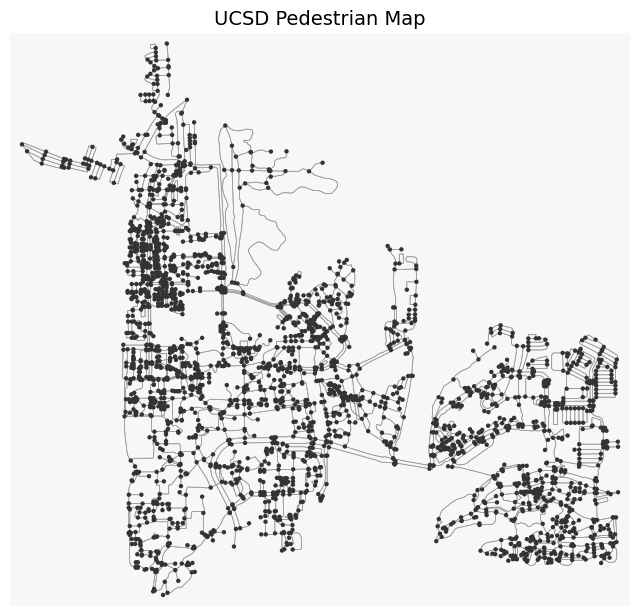

In [3]:
from osmnx import load_graphml
from visualization_controller.map_plotter import plot_static_map
from collections import Counter


G = load_graphml("../data/raw/ucsd_walk.graphml")
plot_static_map(G)

In [10]:
from visualization_controller.map_plotter import plot_interactive_graph_nodes

G = load_graphml("../data/processed/ucsd_walk_semantic.graphml")

In [11]:
from IPython.display import display

#plot_interactive_graph_nodes(G, save_path="ucsd_map.html")

In [7]:
# Collect all poi_types across nodes
poi_counter = Counter()

for _, data in G.nodes(data=True):
    poi_types = data.get("poi_types")
    if poi_types:
        if isinstance(poi_types, list):
            poi_counter.update(poi_types)
        else:
            poi_counter[poi_types] += 1

# Print sorted by count descending
for poi, count in poi_counter.most_common():
    print(f"{poi}: {count}")

unknown: 661
university: 152
yes: 71
parking: 38
apartments: 35
dormitory: 27
restaurant: 19
cafe: 16
fast_food: 12
hospital: 9
residential: 8
greenhouse: 7
theatre: 6
fountain: 5
car_sharing: 4
construction: 4
warehouse: 3
atm: 3
studio: 2
library: 2
bank: 2
charging_station: 2
clinic: 2
vending_machine: 2
school: 2
parcel_locker: 2
pub: 1
industrial: 1
doctors: 1
shelter: 1
research_institute: 1
bar: 1
childcare: 1
arts_centre: 1
college: 1
student_accommodation: 1
pharmacy: 1
bench: 1
library_dropoff: 1
internet_cafe: 1
drinking_water: 1
cinema: 1
post_office: 1
fire_station: 1
office: 1


In [25]:
G_labeled = load_graphml("../data/processed/ucsd_walk_full.graphml")

In [26]:
plot_interactive_graph_nodes(G_labeled, save_path="ucsd_map.html")

Interactive map saved to ucsd_map.html


In [28]:
def get_category_counts(G):
    categories = [
        data.get("Category")
        for _, data in G.nodes(data=True)
        if data.get("Category") is not None
    ]
    return Counter(categories)

# Example usage:
category_counts = get_category_counts(G_labeled)
for cat, count in category_counts.items():
    print(f"{cat}: {count}")

None: 2593
food: 36
study: 101
leisure: 8
health: 13
home: 64
errands: 8
